# NCA - Neighborhood Components Analysis

Neighbourhood components analysis is a **supervised learning method** for classifying multivariate data into distinct classes
 according to **a given distance metric** over the data. Functionally, it serves the same purposes as the K-nearest neighbors algorithm, 
 and makes direct use of a related concept termed **stochastic nearest neighbours**.  
 keywords : 

 
 

### Key Concepts
Neighbourhood components analysis is base on the k-nearest neighbors algorithm (k-NN).  
NCA needs to find a mapping matrix that maps the high-dimensional dataset to the new low-latitude dataset and gets the best performance of classifying the leave-one-out validation method on the new dataset.  
The training process is the process of learning the mapping matrix.







In KNN, two factors affect the accuracy of the KNN algorithm, different k values and different distance algorithms.  
But NCA provides a new idea to reduce the number of features or change the position of data points.

### stochastic nearest neighbours
    1. Randomly picks a point, Ref(x), its label refers as x. 
    2. The label of the target point is predicted to be x,
     which is consistent with the label of a randomly selected point

### Derivation
NCA picks reference points based on stochastic nearest neighbours.  

Set a new distance formula  
    
$d_{w}\left(x_{i}, x_{j}\right)=\sum_{r=1}^{p} w_{r}^{2}\left|x_{i r}-x_{j r}\right|$
  
with $w_{r}^{2}$ is the feature weight.  

And the probability of surrounding points being selected based on their distance.  
$P\left(x_{j} \right) \propto k\left(d_{w}\left(x, x_{j}\right)\right)$  
where k is an equation on distance. According to common sense, the closer the selected point should be to the target point the higher the chance of being selected. Therefore the equation for k is  
$k(z)=\exp \left(-\frac{z}{\sigma}\right)$  
Thus for point i, the probability of selecting point j is  
$p_{i j}=\frac{\exp \left(-d_{w}\left(x_{i}, x_{j}\right)\right)}{\sum_{k \neq i} \exp \left(d_{w}\left(x_{i}, x_{k}\right)\right)}, p_{i i}=0$

From the above, we can see that the true label of the ith sample is yi and if $y_{k}=y_{i}$, then the prediction is correct.
 Let $C_{i}=\left\{j \mid y_{j}=y_{i}\right\}$ denote the set of subscripts with the same class as the ith sample, then the probability of correctly predicting the label of the ith sample using the above Stochastic 1-NN is

$p_{i}=\sum_{j \in C_{i}} p_{i j}$  

Our goal is to make the accuracy rate improve, so the overall probability of predicting the fight is elevated, 
and its overall probability is

$f=\sum_{i=1}^{n} p_{i}=\sum_{i=1}^{n} \sum_{j \in C_{i}} p_{i j}$  
This gives us the equation to be optimized. And we usually use the gradient descent method to solve.
After simplifying and combining like terms, the following gradient is obtained 
$\frac{\partial f}{\partial A}=2 A \sum_{i}\left(p_{i} \sum_{k \neq i} p_{i k}\left(x_{i}-x_{k}\right)\left(x_{i}-x_{k}\right)^{T}-\sum_{j \in C_{i}} p_{i j}\left(x_{i}-x_{j}\right)\left(x_{i}-x_{j}\right)^{T}\right)$


## mapping





Automatically created module for IPython interactive environment


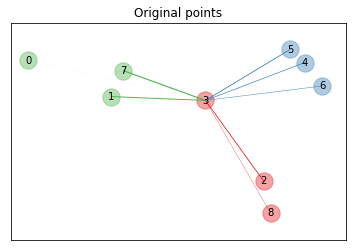

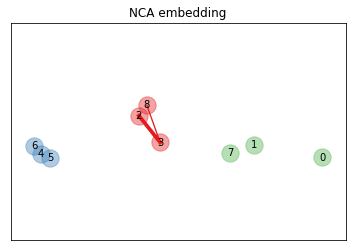

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm
from scipy.special import logsumexp

from navie_py import NCA

print(__doc__)

X, y = make_classification(n_samples=9, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1,
                           class_sep=1.0, random_state=0)

plt.figure(1)
ax = plt.gca()
for i in range(X.shape[0]):
    ax.text(X[i, 0], X[i, 1], str(i), va='center', ha='center')
    ax.scatter(X[i, 0], X[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4)

ax.set_title("Original points")
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axis('equal')  # so that boundaries are displayed correctly as circles


def link_thickness_i(X, i):
    diff_embedded = X[i] - X
    dist_embedded = np.einsum('ij,ij->i', diff_embedded,
                              diff_embedded)
    dist_embedded[i] = np.inf

    # compute exponentiated distances (use the log-sum-exp trick to
    # avoid numerical instabilities
    exp_dist_embedded = np.exp(-dist_embedded -
                               logsumexp(-dist_embedded))
    return exp_dist_embedded


def relate_point(X, i, ax):
    pt_i = X[i]
    for j, pt_j in enumerate(X):
        thickness = link_thickness_i(X, i)
        if i != j:
            line = ([pt_i[0], pt_j[0]], [pt_i[1], pt_j[1]])
            ax.plot(*line, c=cm.Set1(y[j]),
                    linewidth=5*thickness[j])


i = 3
relate_point(X, i, ax)
# plt.show()


nca = NeighborhoodComponentsAnalysis(max_iter=30, random_state=0)
nca = nca.fit(X, y)

# nca = NCA(max_steps= 300,random_state= 0)
nca.fit(X, y)

plt.figure(2)
ax2 = plt.gca()
X_embedded = nca.transform(X)
relate_point(X_embedded, i, ax2)

for i in range(len(X)):
    ax2.text(X_embedded[i, 0], X_embedded[i, 1], str(i),
             va='center', ha='center')
    ax2.scatter(X_embedded[i, 0], X_embedded[i, 1], s=300, c=cm.Set1(y[[i]]),
                alpha=0.4)

ax2.set_title("NCA embedding")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.axis('equal')
plt.show()


### Application on iris with dimension reduction


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from navie_py import NCA

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)



knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(f"the score of the KNN on iris datasets is {knn.score(X_test, y_test)*100:0.5}%")

nca = NeighborhoodComponentsAnalysis(n_components= None ,random_state=42)
nca.fit(X_train, y_train)
knn.fit(nca.transform(X_train), y_train)
print(f"the score of the KNN + NCA on iris datasets without Dimensionality Reduction is {knn.score(nca.transform(X_test), y_test)*100:0.5}%")

nca = NeighborhoodComponentsAnalysis(n_components= 3 ,random_state=42)
nca.fit(X_train, y_train)
knn.fit(nca.transform(X_train), y_train)
print(f"the score of the KNN + NCA on iris datasets with Dimensionality Reduction to 3 is {knn.score(nca.transform(X_test), y_test)*100:0.5}%")

nca = NeighborhoodComponentsAnalysis(n_components= 2 ,random_state=42)
nca.fit(X_train, y_train)
knn.fit(nca.transform(X_train), y_train)
print(f"the score of the KNN + NCA on iris datasets with Dimensionality Reduction to 2 is {knn.score(nca.transform(X_test), y_test)*100:0.5}%")


the score of the KNN on iris datasets is 93.333%
the score of the KNN + NCA on iris datasets without Dimensionality Reduction is 96.19%
the score of the KNN + NCA on iris datasets with Dimensionality Reduction to 3 is 95.238%
the score of the KNN + NCA on iris datasets with Dimensionality Reduction to 2 is 98.095%


### NCA application on iris datasets without dimension reduction

NCA can be seen at this point as a knn using other distance algorithms

Automatically created module for IPython interactive environment


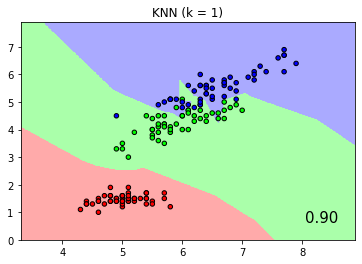

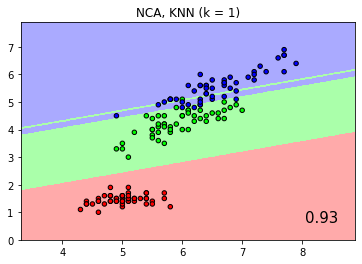

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline


print(__doc__)

n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

h = .01  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

names = ['KNN', 'NCA, KNN']

classifiers = [Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', NeighborhoodComponentsAnalysis()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ])
               ]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

plt.show()
  

## compare with similar algorithms to dimensionality reduction

### PCA
Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data.
### LDA
Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes.
### NCA
Neighborhood Components Analysis (NCA) tries to find a feature space such that a stochastic nearest neighbor algorithm will give the best accuracy.    


Table 1 : compare of the different algorithms  
 
|characteristics|PCA|LDA|NCA|
|:----:|:----:|:----:|:----:|
|Un-/supervised learning|Unsupervised learning|Supervised learning|Supervised learning|
|Purpose| the largest variance in projection direction |the most variance between classes in projection direction| the best performance of the stochastic nearest neighbor algorithm in new space|
Function|Dimensionality reduction|Dimensionality reduction/classification|Dimensionality reduction/classification/regression|
|Downscaling Limits|no limit|max to k-1|no limit|
|Data Distribution|Gaussian distribution|Gaussian distribution|no limit|

Automatically created module for IPython interactive environment


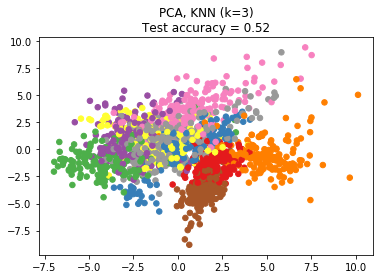

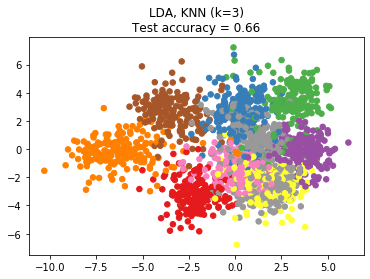

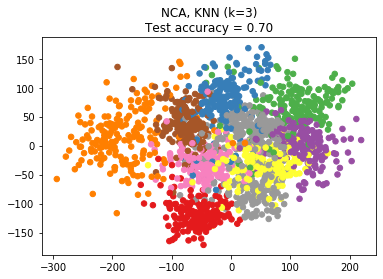

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print(__doc__)

n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

